In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
Dataframe = pd.read_csv("D:\\Jayesh\\Git\\GitHub repos\\Electric-Motor-Temperature-Prediction\\Dataset.csv") # write the path to your dataset here
Dataframe

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.4506815076,18.8051719666,19.0866699219,-0.3500545919,18.2932186127,0.0028655678,0.0044191368,0.0003281022,24.5542144775,18.3165473938,19.8506908417,0.1871007979,17
1,-0.3257369995,18.8185710907,19.0923900604,-0.3058030009,18.2948074341,0.0002567817,0.0006058724,-0.0007853527,24.5380783081,18.3149547577,19.8506717682,0.2454174906,17
2,-0.4408640265,18.8287696838,19.0893802643,-0.3725026250,18.2940940857,0.0023549714,0.0012895871,0.0003864682,24.5446929932,18.3263072968,19.8506565094,0.1766153425,17
3,-0.3270256817,18.8355674744,19.0830307007,-0.3161987066,18.2925415039,0.0061046658,0.0000255843,0.0020456610,24.5540180206,18.3308334351,19.8506469727,0.2383027077,17
4,-0.4711501300,18.8570327759,19.0825252533,-0.3322721422,18.2914276123,0.0031328229,-0.0643167794,0.0371837765,24.5653972626,18.3266620636,19.8506393433,0.2081966549,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.1521284238,30.7212980780,45.2744974889,0.7918007022,41.9343469628,0.0003798703,-2.0001688533,1.0975276342,62.1477796571,38.6537204601,23.9890782461,-0.0000000000,71
1330812,-2.2586835508,30.7213061803,45.2390166753,0.7788999247,41.8689233720,0.0029847847,-2.0004992267,1.0975692661,62.1426457536,38.6563279664,23.9707004991,-0.0000000000,71
1330813,-2.1303122026,30.7213119858,45.2115763447,0.8049144736,41.8048192091,0.0023007847,-1.9992684748,1.0987651178,62.1383873642,38.6509230852,23.9772342602,-0.0000000000,71
1330814,-2.2684984954,30.7213161456,45.1935076117,0.7630907425,41.7622195062,0.0056621397,-2.0009986051,1.0956963085,62.1334215151,38.6556863447,24.0014212107,-0.0000000000,71


**1. u_q** : Voltage q-component measurement in dq-coordinates (in V)

**2. coolant** : Coolant temperature (in °C)

**3. stator_winding** : Stator winding temperature (in °C) measured with thermocouples

**4. u_d** : Voltage d-component measurement in dq-coordinates

**5. stator_tooth** : Stator tooth temperature (in °C) measured with thermocouples

**6. motor_speed** : Motor speed (in rpm)

**7. i_d** : Current d-component measurement in dq-coordinates

**8. i_q** : Current q-component measurement in dq-coordinates

**9. pm** : Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly

**10. stator_yoke** : Stator yoke temperature (in °C) measured with thermocouples

**11. ambient** : Ambient temperature (in °C)

**12. torque** : Motor torque (in Nm)

**13. profile_id** : Measurement session id. Each distinct measurement session can be identified through this integer

In [41]:
features = list(Dataframe.keys())
features.remove('profile_id')
features

['u_q',
 'coolant',
 'stator_winding',
 'u_d',
 'stator_tooth',
 'motor_speed',
 'i_d',
 'i_q',
 'pm',
 'stator_yoke',
 'ambient',
 'torque']

In [9]:
# Show full float values instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [10]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [ ]:
Dataframe.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000
mean,54.2790045465,36.2299948401,66.3427453950,-25.1338093926,56.8785819968,2202.0807277890,-68.7168096186,37.4127823475,58.5067758506,48.1879648649,24.5652559521,31.1060323797,40.7930615502
std,44.1732335618,21.7861489734,28.6720608787,63.0919716010,22.9522330658,1859.6633503968,64.9332331921,92.1818796503,19.0014977140,19.9910039983,1.9295218592,77.1357548109,25.0454936774
min,-25.2909297943,10.6237512736,18.5858154297,-131.5304107666,18.1339759827,-275.5491441113,-278.0036315918,-293.4267929416,20.8569564819,18.0766887665,8.7834783440,-246.4666631891,2.0000000000
25%,12.0699248314,18.6981353760,42.7879569080,-78.6909040646,38.4160118103,317.1106647331,-115.4060599634,1.0958628470,43.1515820132,31.9903330803,23.1848044395,-0.1374265291,17.0000000000
50%,48.9381809235,26.9001408291,65.1101288795,-7.4297545442,56.0363454943,1999.9766845703,-51.0937629721,15.7740068436,60.2662870150,45.6255092411,24.7973267700,10.8603539467,43.0000000000
75%,90.0343929010,49.8574869235,88.1411371438,1.4702705443,75.5866817895,3760.6390583028,-2.9796881676,100.6121495121,72.0083710780,61.4608276338,26.2170190393,91.5971757664,65.0000000000
max,133.0369935104,101.5985120810,141.3628845215,131.4697875977,111.9464234139,6000.0151367188,0.0518967025,301.7078552246,113.6066284180,101.1479643648,30.7142047882,261.0057067871,81.0000000000


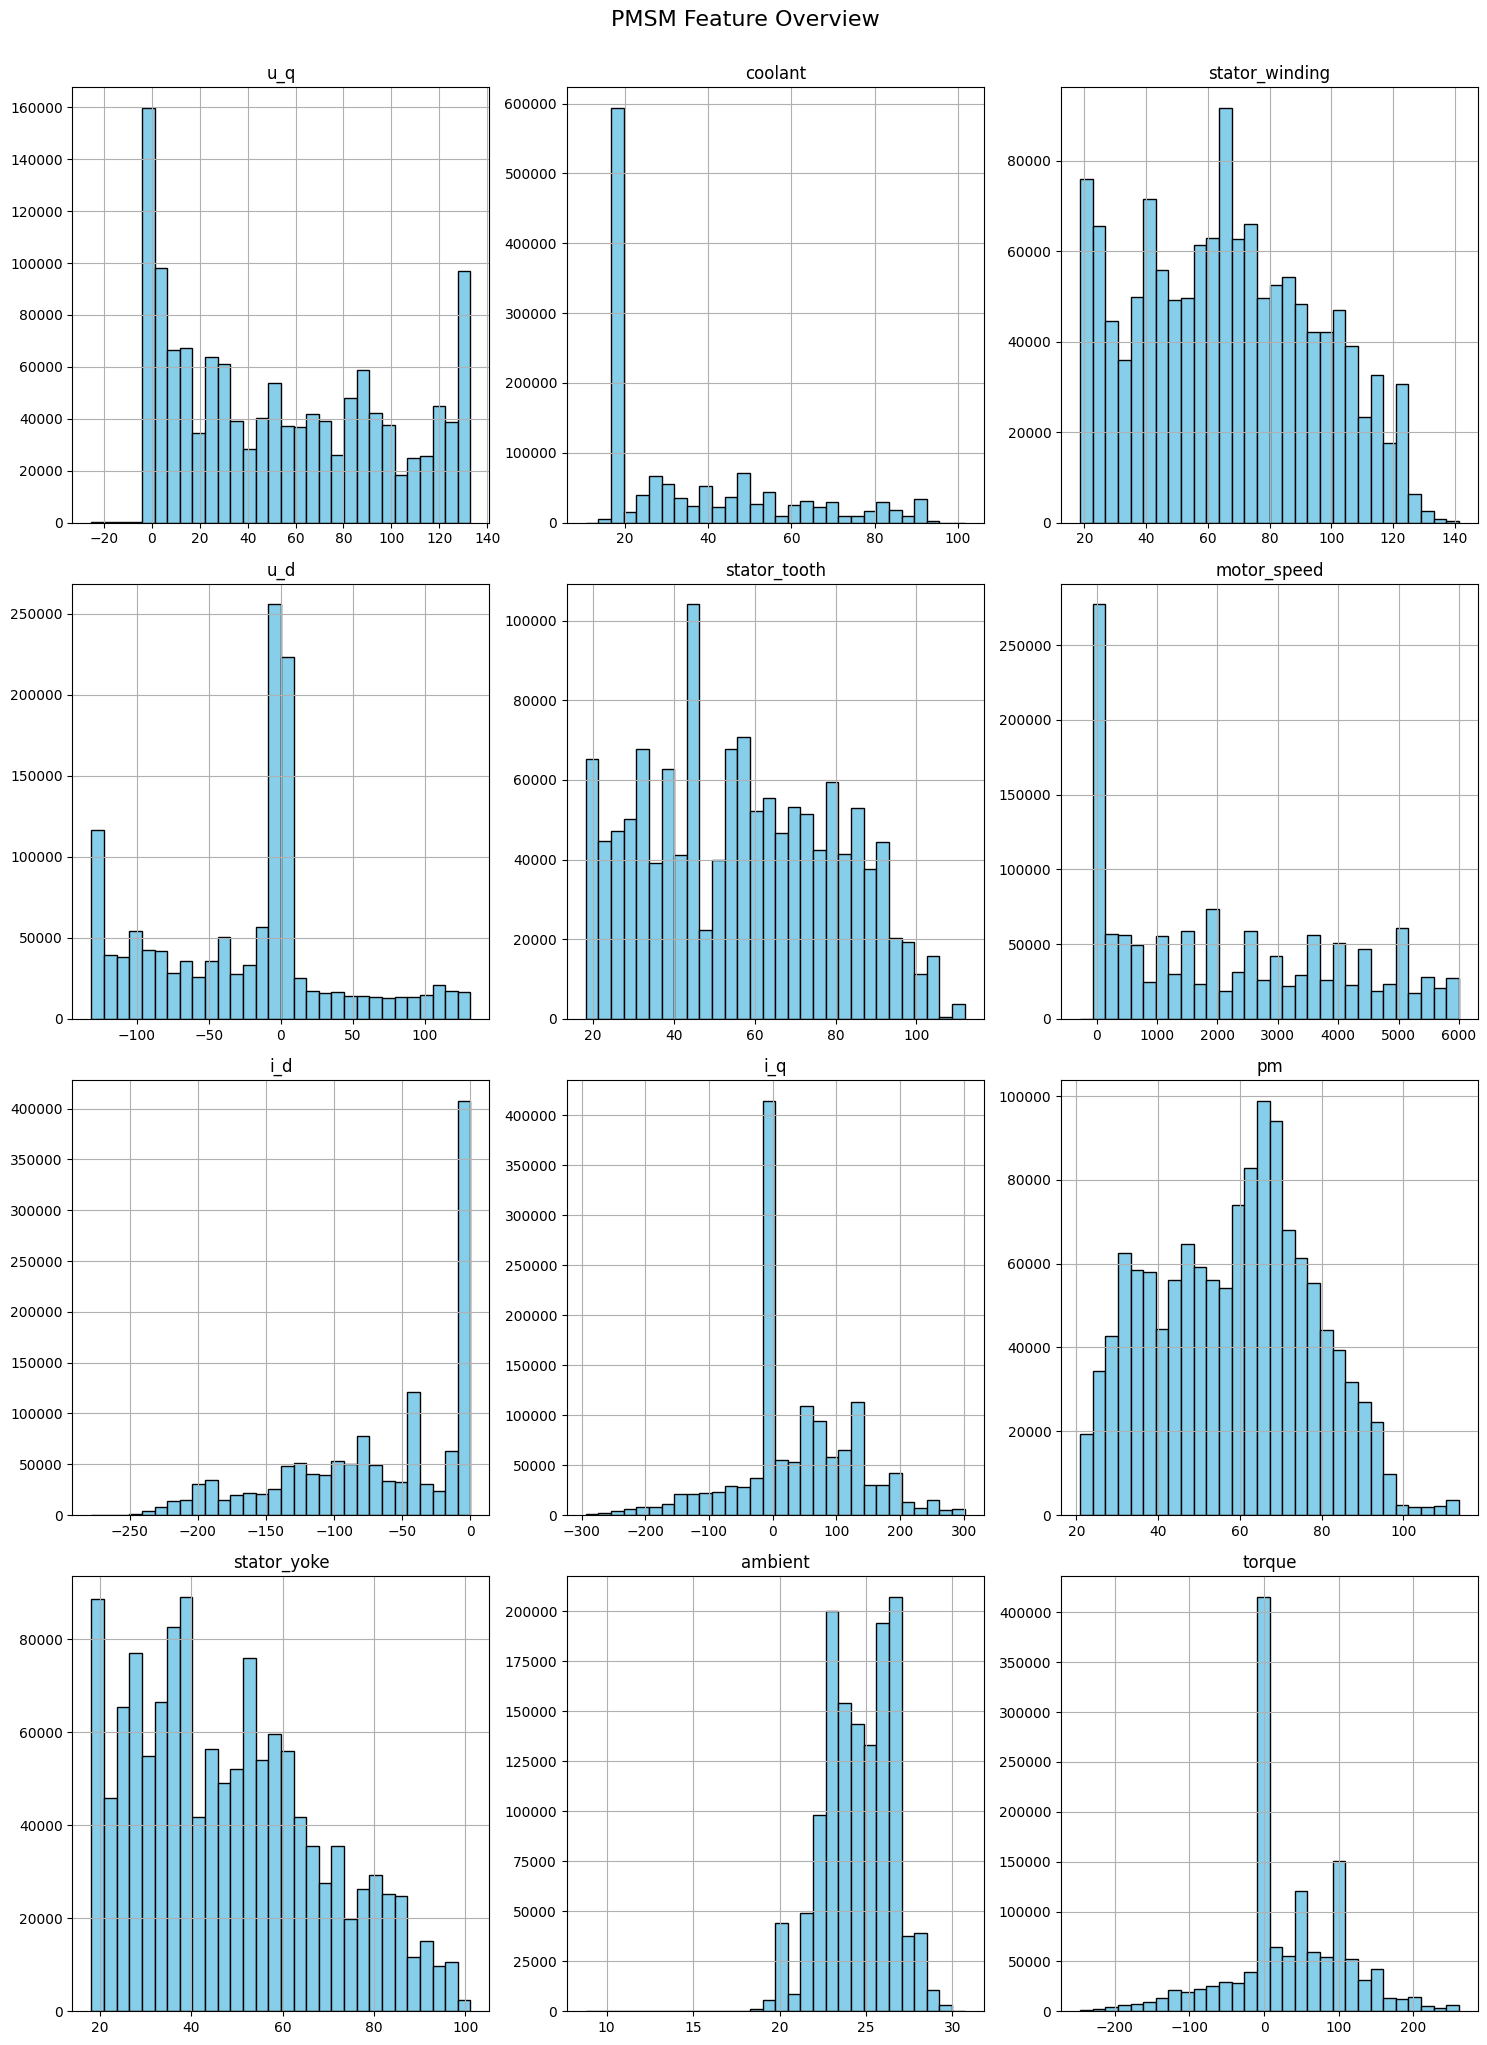

In [46]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(Dataframe[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].grid(True)

fig.tight_layout()
fig.suptitle('PMSM Feature Overview', fontsize=16, y=1.02)
plt.show()